# Automatização da Base Consolidada

### Listar os arquivos:

* Rodar código a baixo, ele vai listar todos os documentos que temos na pasta de tratadas e de consolidada (como a macro fazia)
###### OBS: no código da consolidada devemos selecionar o mês no código para buscar a pasta certa...


* Em seguida basta copiar o arquivo que quisermos e colar quando o código pedir a base!


In [1]:
# Importando as bibliotecas que serão usadas
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Definindo uma função que será usada para formatar os dados em forma de valor

def formatar(valor):
    return '{:.2f}'.format(valor)

In [2]:
# Listar todos os Arquivos que temos em uma determinada pasta

# Com esse "os.chdir()" nós pegamos o diretório para buscar os arquivos
mes_pasta = os.getcwd()
mes_pasta = os.listdir()

print("Pasta dos meses")
for pasta in mes_pasta:
    print(pasta)

#OK

Pasta dos meses
1. Janeiro
2. Fevereiro
Base Consolidada Automatica .ipynb
Base de Importação Automática.ipynb
Tratadas
validação.xlsx


In [3]:
# Lista a Base de Tratadas

base_tratada = os.chdir(r'C:\Users\lucas\Python Projects\Tratamento de Dados - Pandas\Tratadas')
base_tratada = os.listdir()
 
print("Bases TRATADAS")
for file in base_tratada:
    print(file)

#OK

Bases TRATADAS
202302_tratada823.xlsx


In [4]:
#Lista a Base de Consolidads, referente ao mês associado
x = str(input("Qual pasta você quer abrir: "))
y = str(input("Qual pasta de insumo você quer abrir: "))
print()

base_consolidada = os.chdir(r'C:\Users\lucas\Python Projects\Tratamento de Dados - Pandas\{}'.format(x))
base_consolidada = os.listdir()

print("Base CONSOLIDADA atual")
for doc in base_consolidada:
    print(doc)
    
base_insumo = os.chdir(r'C:\Users\lucas\Python Projects\Tratamento de Dados - Pandas\{}'.format(y))
base_insumo = os.listdir()

print()
print("Base CONSOLIDADA insumo")
for doc in base_insumo:
    print(doc)

#OK


Base CONSOLIDADA atual
fevereiro2023823.xlsx

Base CONSOLIDADA insumo
janeiro2023823.xlsx


In [5]:
tratada = str(input("Adicione a planilha TRATADA que quer abrir: "))

consolidada = str(input("Adicione a planilha CONSOLIDADA quer abrir: "))

consolidada_mes_anterior = str(input("Adicione a planilha CONSOLIDADA do mês anterior (insumo): "))

pagamentos_tratada_df = pd.read_excel(r"C:\Users\lucas\Python Projects\Tratamento de Dados - Pandas\Tratadas\{}".format(tratada), sheet_name = "Base")
provisoes_tratada_df = pd.read_excel(r"C:\Users\lucas\Python Projects\Tratamento de Dados - Pandas\Tratadas\{}".format(tratada), sheet_name = "Plan 1")
# display()

# Referente a base atual que vamos mexer
pagamentos_geral_df = pd.read_excel(r"C:\Users\lucas\Python Projects\Tratamento de Dados - Pandas\{}\{}".format(x, consolidada), sheet_name = "Pagamentos_consolidado")
provisao_geral_df = pd.read_excel(r"C:\Users\lucas\Python Projects\Tratamento de Dados - Pandas\{}\{}".format(x, consolidada), sheet_name = "Provisao_atualizada")
juridicotudo_df = pd.read_excel(r"C:\Users\lucas\Python Projects\Tratamento de Dados - Pandas\{}\{}".format(x,consolidada), sheet_name = "Juridico_tudo")
# display()

# Referente a base do mês anterior que serve de insumo
pagamentos_anterior_df = pd.read_excel(r"C:\Users\lucas\Python Projects\Tratamento de Dados - Pandas\{}\{}".format(y, consolidada_mes_anterior), sheet_name = "Pagamentos_consolidado")
consolidado_anterior_df = pd.read_excel(r"C:\Users\lucas\Python Projects\Tratamento de Dados - Pandas\{}\{}".format(y, consolidada_mes_anterior), sheet_name = "Juridico_tudo")
# display(consolidado_anterior_df)

#OK


## Passo a Passo para montar o Consolidado!

#### Pagamentos
1. Filtrar apenas as informações de HONORÁRIOS, PAGAMENTOS E ...;
2. Juntar a base tratada de pagamentos com a consolidada atual;
3. Atualizar os valores dos ID's já existentes na consolidada atual;
4. Fazer a validação dos valores (soma pagamentos atual - soma tratada) == soma pagamentos anterior

In [6]:
# PAGAMENTOS:

#1. Filtrar apenas o que seja, PAGAMENTOS, HONORÁRIOS E ... "OK"
apenas_pagamentos_df = pagamentos_tratada_df[pagamentos_tratada_df["Descrição "] != 'Provisão']
#display(apenas_pagamentos_df) 
apenas_pagamentos_df = apenas_pagamentos_df.rename(columns={'Cia': 'Cod Cia Contabil Dep', 'Valor Total Bruto': 'Valor Total'})

#2. Juntar bases tratada de pagamentos com a consolidada atual
# Vamos precisar somar os valores da tratada com o valores já existentes na consolidada
pagamentos_consolidado = pd.concat([pagamentos_geral_df, apenas_pagamentos_df])
#display(pagamentos_consolidado)

#3. Atualizar os dados dos ID's que já existem e criar novos caso necessário
pagamentos_consolidado = pagamentos_consolidado.groupby('Pasta').agg({'Cod Cia Contabil Dep': 'first', 'Desc Tipo Acao': 'first', 'Valor Total': "sum", 'Descrição ': 'first', 'Data de Sinistro': 'first', 'Data de Citação': 'first', 'Desc Area': 'first', 'Desc Causa Raiz': 'first', 'Desc Especificacao Assunto': 'first', 'Desc Assunto': 'first','Desc Objeto Assunto': 'first', 'Desc Macrocausa': 'first', 'Desc Causa': 'first'})
display(pagamentos_consolidado)

pagamentos_consolidado.to_excel(r'C:\Users\lucas\Python Projects\Tratamento de Dados - Pandas\validação.xlsx', index=True)

#OK


,Cod Cia Contabil Dep,Desc Tipo Acao,Valor Total,Descrição,Data de Sinistro,Data de Citação,Desc Area,Desc Causa Raiz,Desc Especificacao Assunto,Desc Assunto,Desc Objeto Assunto,Desc Macrocausa,Desc Causa
Pasta,,,,,,,,,,,,,
8237CIV-01770/14,823,NÃO SINISTRO,22.17000,Pagamento,NaN,2014-02-17,OUTROS,None,None,None,None,None,None
823CIV 038944/18,823,None,3011.99000,Pagamento,NaN,NaT,None,None,None,None,None,None,None
823CIV-000004/19,823,NÃO SINISTRO,470.00000,Honorários,NaN,2018-12-28,CAPITALIZAÇÃO,RESGATE,PRODUTO,VALOR DO RESGATE,NGA,CONDIÇÃO/EXCLUSÃO CONTRATUAL,RESERVA MATEMÁTICA
823CIV-000060/18,823,NÃO SINISTRO,478.80000,Pagamento,NaN,2018-01-03,CAPITALIZAÇÃO,RESGATE,PRODUTO,VALOR DO RESGATE,TITULO SUPER FACIL,CONDIÇÃO/EXCLUSÃO CONTRATUAL,RESERVA MATEMÁTICA
823CIV-000065/17,823,NÃO SINISTRO,3303.92000,Honorários,NaN,2012-07-27,OUTROS,OUTROS,EXECUÇÃO FISCAL IPTU,OUTROS - IMOBILIÁRIO,CIACARDS - OUTROS,CIACARDS - OUTROS,CIACARDS - OUTROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823TRA-007876/22,823,NÃO SINISTRO,262.99000,Honorários,NaN,2022-08-24,TRABALHISTA,TRABALHISTA - TERCEIROS,AO - CAPITALIZAÇÃO,AO - CIACARDS,CIACARDS - TRABALHISTA,AO - CAPITALIZAÇÃO,AO - CAPITALIZAÇÃO
823TRA-008095/22,823,NÃO SINISTRO,394.07691,Honorários,NaN,2022-09-16,TRABALHISTA,TRABALHISTA - TERCEIROS,AO - CAPITALIZAÇÃO,AO - CIACARDS,CIACARDS - TRABALHISTA,AO - CAPITALIZAÇÃO,AO - CAPITALIZAÇÃO
823TRA-008255/18,823,NÃO SINISTRO,5902.51000,Honorários,NaN,2018-11-16,TRABALHISTA,TRABALHISTA - CONTRATUAL,AO - CAPITALIZAÇÃO,AO - CIACARDS,CIACARDS - TRABALHISTA,AO - CAPITALIZAÇÃO,AO - CAPITALIZAÇÃO


In [7]:
#4. (Somar o resultado final da coluna de valor e - subtrair com a soma da tratada de pagamentos) == e comparar com a consolidada anterior
pag_atual = pagamentos_consolidado['Valor Total'].sum()
#print(f'{pag_atual:.0f}')
pag_tratada = apenas_pagamentos_df['Valor Total'].sum()
#print(f'{pag_tratada:.0f}')
pag_anterior = int(pagamentos_anterior_df['Valor Total'].sum())
print(f'{pag_anterior:.0f}')

validacao = int(pag_atual - pag_tratada)
print(f'{validacao:.0f}')

# IF
if validacao == pag_anterior:
    print("Validação concluída e os resultado são iguais")
else:
    print("Validação concluída e os resultados são diferentes")

#OK

56304283
56304283
Validação concluída e os resultado são iguais


#### Provisões
1. Juntar base de provisões tratadas com a consolidada atual; 
2. Substituir as informações já existes e criar novas caso necessário;
3. Fazer um "PROC-V" para ver se os ID's correspondem com os que temos na base tratada, caso não == ERRO;
4. Todos que forem iguais a ERRO, devemos colocar o valor igual a 0;
5. Somar e ver se o resultado bate com os valores da TRATADA de provisao;

In [8]:
# PROVISÕES:

#1. Juntar base de provisões tratadas com a consolidada atual 
apenas_provisoes_df = pagamentos_tratada_df[pagamentos_tratada_df["Descrição "] == 'Provisão']
tratadas_separadas = provisoes_tratada_df.drop(['Cia', 'Desc Tipo Acao', 'Descrição '], axis=1)
# display(apenas_provisoes_df)

#2. Substituir os valores da tratada na consolidada e criar novas caso necessário
apenas_provisoes_df = apenas_provisoes_df.rename(columns={'Cia': 'Cod Cia Contabil Dep', 'Valor Total Bruto': 'Valor Total'})
#display(apenas_provisoes_df)

provisoes_consolidado = pd.concat([provisao_geral_df, apenas_provisoes_df])
#display(provisoes_consolidado)

provisoes_consolidado = provisoes_consolidado.groupby('Pasta').agg({'Cod Cia Contabil Dep': 'first', 'Desc Tipo Acao': 'first', 'Valor Total': "sum", 'Descrição ': 'first', 'Data de Sinistro': 'first', 'Data de Citação': 'first', 'Desc Area': 'first', 'Desc Causa Raiz': 'first', 'Desc Especificacao Assunto': 'first', 'Desc Assunto': 'first','Desc Objeto Assunto': 'first', 'Desc Macrocausa': 'first', 'Desc Causa': 'first'})
# display(provisoes_consolidado)

#3. Fazer um "PROC-V" para ver se os ID's correspondem com os que temos na base tratada, caso não == ERRO
provisoes_consolidado = pd.merge(provisoes_consolidado, tratadas_separadas, how='left', on='Pasta')
provisoes_consolidado['Valor Total Bruto'].fillna("ERRO", inplace = True)
# display(provisoes_consolidado)

#4. Todos que forem iguais a ERRO, devemos colocar o valor igual a 0
valores_novos = provisoes_consolidado['Valor Total Bruto'].copy()

provisoes_consolidado.loc[provisoes_consolidado["Valor Total Bruto"] == 'ERRO', "Valor Total"] = 0
provisoes_consolidado.loc[provisoes_consolidado["Valor Total Bruto"] != 'ERRO', "Valor Total"] = valores_novos


provisoes_consolidado = provisoes_consolidado.drop(['Valor Total Bruto'], axis = 1)
display(provisoes_consolidado)

#OK

,Pasta,Cod Cia Contabil Dep,Desc Tipo Acao,Valor Total,Descrição,Data de Sinistro,Data de Citação,Desc Area,Desc Causa Raiz,Desc Especificacao Assunto,Desc Assunto,Desc Objeto Assunto,Desc Macrocausa,Desc Causa
0,823CIV-000004/19,823,NÃO SINISTRO,0.0,Provisão,NaN,2018-12-28,CAPITALIZAÇÃO,RESGATE,PRODUTO,VALOR DO RESGATE,NGA,CONDIÇÃO/EXCLUSÃO CONTRATUAL,RESERVA MATEMÁTICA
1,823CIV-000065/17,823,NÃO SINISTRO,0.0,Provisão,NaN,2012-07-27,OUTROS,OUTROS,EXECUÇÃO FISCAL IPTU,OUTROS - IMOBILIÁRIO,CIACARDS - OUTROS,CIACARDS - OUTROS,CIACARDS - OUTROS
2,823CIV-000204/17,823,NÃO SINISTRO,107.7,Provisão,NaN,2017-01-03,CAPITALIZAÇÃO,ANULATORIA,MULTA PROCON,ANULATORIA,None,FALHA INTERNA,ERRO DE ANÁLISE/TÉCNICO
3,823CIV-000222/15,823,NÃO SINISTRO,5815.83,Provisão,NaN,2014-08-20,OUTROS,OUTROS,EXECUÇÃO FISCAL TAXA DE LIXO,OUTROS - IMOBILIÁRIO,CIACARDS - OUTROS,CIACARDS - OUTROS,CIACARDS - OUTROS
4,823CIV-000246/15,823,NÃO SINISTRO,0.0,Provisão,NaN,2015-01-08,OUTROS,OUTROS,EXECUÇÃO FISCAL IPTU,OUTROS - IMOBILIÁRIO,CIACARDS - OUTROS,CIACARDS - OUTROS,CIACARDS - OUTROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,823TRA-007498/18,823,Ñ SE APLICA,0.0,Provisão,NaN,2018-10-25,TRABALHISTA,TRABALHISTA - TERCEIROS,TRABALHISTA - DESENVOLVIMENTO DE SISTEMAS - TI,VIDTI - TECNOLOGIA DA INFORMAÇÃO,VIDTI,VIDTI,VIDTI
1391,823TRA-007876/22,823,NÃO SINISTRO,0.0,Provisão,NaN,2022-08-24,TRABALHISTA,TRABALHISTA - TERCEIROS,AO - CAPITALIZAÇÃO,AO - CIACARDS,CIACARDS - TRABALHISTA,AO - CAPITALIZAÇÃO,AO - CAPITALIZAÇÃO
1392,823TRA-008095/22,823,NÃO SINISTRO,0.0,Provisão,NaN,2022-09-16,TRABALHISTA,TRABALHISTA - TERCEIROS,AO - CAPITALIZAÇÃO,AO - CIACARDS,CIACARDS - TRABALHISTA,AO - CAPITALIZAÇÃO,AO - CAPITALIZAÇÃO
1393,823TRA-008255/18,823,Ñ SE APLICA,0.0,Provisão,NaN,2018-11-16,TRABALHISTA,TRABALHISTA - CONTRATUAL,AO - CAPITALIZAÇÃO,AO - CIACARDS,CIACARDS - TRABALHISTA,AO - CAPITALIZAÇÃO,AO - CAPITALIZAÇÃO


In [9]:
#5. Somar e ver se o resultado bate com os valores da TRATADA de provisaop
provisao_atual = int(provisoes_consolidado['Valor Total'].sum())
print(f'{provisao_atual:.0f}')
provisao_da_tratada = int(provisoes_tratada_df['Valor Total Bruto'].sum())
print(f'{provisao_da_tratada:.0f}')

if provisao_atual == provisao_da_tratada:
    print("Validação concluída e os resultado são iguais")
else:
    print("Validação concluída e os resultados são diferentes")

#OK

36271526
36271526
Validação concluída e os resultado são iguais


# Montando Jurídico Tudo

#### Jurídico Tudo
1. Juntar bases de PAGAMENTOS e PROVISÕES (somando os valores) -concat & merge;
2. Substituir os valores da soma na coluna D;
3. Criar uma coluna de 'Perda_passada' com os valores da coluna D da consolidada anterior;
4. Criar uma coluna de validação de números binários;

In [10]:
pagamentos_consolidado = pd.read_excel(r'C:\Users\lucas\Python Projects\Tratamento de Dados - Pandas\validação.xlsx')


# 1. Juntar bases de PAGAMENTOS e PROVISÕES (somando os valores) -concat & merge;
juridico_tudo2 = pd.concat([pagamentos_consolidado, provisoes_consolidado])
# display(juridico_tudo)

# 2. Substituir os valores da soma na coluna D;
juridico_tudo2 = juridico_tudo2.groupby('Pasta').agg({'Cod Cia Contabil Dep': 'first', 'Desc Tipo Acao': 'first', 'Valor Total': "sum", 'Descrição ': 'first', 'Data de Sinistro': 'first', 'Data de Citação': 'first', 'Desc Area': 'first', 'Desc Causa Raiz': 'first', 'Desc Especificacao Assunto': 'first', 'Desc Assunto': 'first','Desc Objeto Assunto': 'first', 'Desc Macrocausa': 'first', 'Desc Causa': 'first'})
# display(juridico_tudo2)

juridico_tratada = juridico_tudo2.drop(['Cod Cia Contabil Dep', 'Desc Tipo Acao', 'Descrição ', 'Data de Sinistro', 'Data de Citação', 'Desc Area', 'Desc Causa Raiz', 'Desc Especificacao Assunto', 'Desc Assunto', 'Desc Objeto Assunto', 'Desc Macrocausa', 'Desc Causa'], axis=1)
juridico_tratada = juridico_tratada.rename(columns={'Valor Total': 'Valor Bruto'})
# display(juridico_tratada)


juridico_tudo2.to_excel(r'C:\Users\lucas\Python Projects\Tratamento de Dados - Pandas\validação.xlsx', index=True)

#OK

In [11]:
juridico_tudo2 = pd.read_excel(r'C:\Users\lucas\Python Projects\Tratamento de Dados - Pandas\validação.xlsx')
# display(juridico_tudo2)

juridico_final = pd.concat([juridicotudo_df, juridico_tudo2])
juridico_final = juridico_tudo2.groupby('Pasta').agg({'Cod Cia Contabil Dep': 'first', 'Desc Tipo Acao': 'first', 'Valor Total': "sum", 'Descrição ': 'first', 'Data de Sinistro': 'first', 'Data de Citação': 'first', 'Desc Area': 'first', 'Desc Causa Raiz': 'first', 'Desc Especificacao Assunto': 'first', 'Desc Assunto': 'first','Desc Objeto Assunto': 'first', 'Desc Macrocausa': 'first', 'Desc Causa': 'first'})

display(juridico_final)

#OK

,Cod Cia Contabil Dep,Desc Tipo Acao,Valor Total,Descrição,Data de Sinistro,Data de Citação,Desc Area,Desc Causa Raiz,Desc Especificacao Assunto,Desc Assunto,Desc Objeto Assunto,Desc Macrocausa,Desc Causa
Pasta,,,,,,,,,,,,,
8237CIV-01770/14,823,NÃO SINISTRO,22.17000,Pagamento,NaN,2014-02-17,OUTROS,None,None,None,None,None,None
823CIV 038944/18,823,None,3011.99000,Pagamento,NaN,NaT,None,None,None,None,None,None,None
823CIV-000004/19,823,NÃO SINISTRO,470.00000,Honorários,NaN,2018-12-28,CAPITALIZAÇÃO,RESGATE,PRODUTO,VALOR DO RESGATE,NGA,CONDIÇÃO/EXCLUSÃO CONTRATUAL,RESERVA MATEMÁTICA
823CIV-000060/18,823,NÃO SINISTRO,478.80000,Pagamento,NaN,2018-01-03,CAPITALIZAÇÃO,RESGATE,PRODUTO,VALOR DO RESGATE,TITULO SUPER FACIL,CONDIÇÃO/EXCLUSÃO CONTRATUAL,RESERVA MATEMÁTICA
823CIV-000065/17,823,NÃO SINISTRO,3303.92000,Honorários,NaN,2012-07-27,OUTROS,OUTROS,EXECUÇÃO FISCAL IPTU,OUTROS - IMOBILIÁRIO,CIACARDS - OUTROS,CIACARDS - OUTROS,CIACARDS - OUTROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823TRA-007876/22,823,NÃO SINISTRO,262.99000,Honorários,NaN,2022-08-24,TRABALHISTA,TRABALHISTA - TERCEIROS,AO - CAPITALIZAÇÃO,AO - CIACARDS,CIACARDS - TRABALHISTA,AO - CAPITALIZAÇÃO,AO - CAPITALIZAÇÃO
823TRA-008095/22,823,NÃO SINISTRO,394.07691,Honorários,NaN,2022-09-16,TRABALHISTA,TRABALHISTA - TERCEIROS,AO - CAPITALIZAÇÃO,AO - CIACARDS,CIACARDS - TRABALHISTA,AO - CAPITALIZAÇÃO,AO - CAPITALIZAÇÃO
823TRA-008255/18,823,NÃO SINISTRO,5902.51000,Honorários,NaN,2018-11-16,TRABALHISTA,TRABALHISTA - CONTRATUAL,AO - CAPITALIZAÇÃO,AO - CIACARDS,CIACARDS - TRABALHISTA,AO - CAPITALIZAÇÃO,AO - CAPITALIZAÇÃO


In [12]:
juridico_final = pd.merge(juridico_final, juridico_tratada, how='left', on='Pasta')
# display(juridico_final)

valores_finais = juridico_final['Valor Bruto'].copy()
juridico_final.loc[juridico_final["Valor Bruto"] != 'ERRO', "Valor Total"] = valores_finais

juridico_final = juridico_final.drop(['Valor Bruto'], axis = 1)
display(juridico_final)

#OK

,Cod Cia Contabil Dep,Desc Tipo Acao,Valor Total,Descrição,Data de Sinistro,Data de Citação,Desc Area,Desc Causa Raiz,Desc Especificacao Assunto,Desc Assunto,Desc Objeto Assunto,Desc Macrocausa,Desc Causa
Pasta,,,,,,,,,,,,,
8237CIV-01770/14,823,NÃO SINISTRO,22.17,Pagamento,NaN,2014-02-17,OUTROS,None,None,None,None,None,None
823CIV 038944/18,823,None,3011.99,Pagamento,NaN,NaT,None,None,None,None,None,None,None
823CIV-000004/19,823,NÃO SINISTRO,470.0,Honorários,NaN,2018-12-28,CAPITALIZAÇÃO,RESGATE,PRODUTO,VALOR DO RESGATE,NGA,CONDIÇÃO/EXCLUSÃO CONTRATUAL,RESERVA MATEMÁTICA
823CIV-000060/18,823,NÃO SINISTRO,478.8,Pagamento,NaN,2018-01-03,CAPITALIZAÇÃO,RESGATE,PRODUTO,VALOR DO RESGATE,TITULO SUPER FACIL,CONDIÇÃO/EXCLUSÃO CONTRATUAL,RESERVA MATEMÁTICA
823CIV-000065/17,823,NÃO SINISTRO,3303.92,Honorários,NaN,2012-07-27,OUTROS,OUTROS,EXECUÇÃO FISCAL IPTU,OUTROS - IMOBILIÁRIO,CIACARDS - OUTROS,CIACARDS - OUTROS,CIACARDS - OUTROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823TRA-007876/22,823,NÃO SINISTRO,262.99,Honorários,NaN,2022-08-24,TRABALHISTA,TRABALHISTA - TERCEIROS,AO - CAPITALIZAÇÃO,AO - CIACARDS,CIACARDS - TRABALHISTA,AO - CAPITALIZAÇÃO,AO - CAPITALIZAÇÃO
823TRA-008095/22,823,NÃO SINISTRO,394.07691,Honorários,NaN,2022-09-16,TRABALHISTA,TRABALHISTA - TERCEIROS,AO - CAPITALIZAÇÃO,AO - CIACARDS,CIACARDS - TRABALHISTA,AO - CAPITALIZAÇÃO,AO - CAPITALIZAÇÃO
823TRA-008255/18,823,NÃO SINISTRO,5902.51,Honorários,NaN,2018-11-16,TRABALHISTA,TRABALHISTA - CONTRATUAL,AO - CAPITALIZAÇÃO,AO - CIACARDS,CIACARDS - TRABALHISTA,AO - CAPITALIZAÇÃO,AO - CAPITALIZAÇÃO


In [13]:
# 3. Criar uma coluna de 'Perda_passada' com os valores da coluna D da consolidada anterior;
consolidado_anterior_df = consolidado_anterior_df.drop(['Cod Cia Contabil Dep', 'Desc Tipo Acao', 'Descrição ', 'Data de Sinistro', 'Data de Citação', 'Desc Area', 'Desc Causa Raiz', 'Desc Especificacao Assunto', 'Desc Assunto','Desc Objeto Assunto', 'Desc Macrocausa', 'Desc Causa', 'Perda_passada', 'Aux_igual'], axis=1)
consolidado_anterior_df = consolidado_anterior_df.rename(columns={'Valor Total': 'Perda_passada'})
display(consolidado_anterior_df)

#OK

,Pasta,Perda_passada
0,823REG-001110/15,160689.63
1,823CIV-025051/17,20.00
2,823CIV-002803/15,9091.42
3,823CIV-003409/17,10502.54
4,823CIV-017554/14,15110.21
...,...,...
1561,823CIV-011592/22,0.00
1562,823CIV-026172/22,0.00
1563,823CIV-032075/22,0.00
1564,823CIV-038021/22,0.00


In [14]:
juridico_final = pd.merge(juridico_final, consolidado_anterior_df, how='left', on='Pasta')

# Aplicando a função criada
juridico_final['Perda_passada'] = juridico_final['Perda_passada'].apply(formatar)

display(juridico_final)

#OK

,Pasta,Cod Cia Contabil Dep,Desc Tipo Acao,Valor Total,Descrição,Data de Sinistro,Data de Citação,Desc Area,Desc Causa Raiz,Desc Especificacao Assunto,Desc Assunto,Desc Objeto Assunto,Desc Macrocausa,Desc Causa,Perda_passada
0,8237CIV-01770/14,823,NÃO SINISTRO,22.17,Pagamento,NaN,2014-02-17,OUTROS,None,None,None,None,None,None,22.17
1,823CIV 038944/18,823,None,3011.99,Pagamento,NaN,NaT,None,None,None,None,None,None,None,3011.99
2,823CIV-000004/19,823,NÃO SINISTRO,470.0,Honorários,NaN,2018-12-28,CAPITALIZAÇÃO,RESGATE,PRODUTO,VALOR DO RESGATE,NGA,CONDIÇÃO/EXCLUSÃO CONTRATUAL,RESERVA MATEMÁTICA,470.00
3,823CIV-000060/18,823,NÃO SINISTRO,478.8,Pagamento,NaN,2018-01-03,CAPITALIZAÇÃO,RESGATE,PRODUTO,VALOR DO RESGATE,TITULO SUPER FACIL,CONDIÇÃO/EXCLUSÃO CONTRATUAL,RESERVA MATEMÁTICA,478.80
4,823CIV-000065/17,823,NÃO SINISTRO,3303.92,Honorários,NaN,2012-07-27,OUTROS,OUTROS,EXECUÇÃO FISCAL IPTU,OUTROS - IMOBILIÁRIO,CIACARDS - OUTROS,CIACARDS - OUTROS,CIACARDS - OUTROS,3248.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,823TRA-007876/22,823,NÃO SINISTRO,262.99,Honorários,NaN,2022-08-24,TRABALHISTA,TRABALHISTA - TERCEIROS,AO - CAPITALIZAÇÃO,AO - CIACARDS,CIACARDS - TRABALHISTA,AO - CAPITALIZAÇÃO,AO - CAPITALIZAÇÃO,262.99
1567,823TRA-008095/22,823,NÃO SINISTRO,394.07691,Honorários,NaN,2022-09-16,TRABALHISTA,TRABALHISTA - TERCEIROS,AO - CAPITALIZAÇÃO,AO - CIACARDS,CIACARDS - TRABALHISTA,AO - CAPITALIZAÇÃO,AO - CAPITALIZAÇÃO,308.24
1568,823TRA-008255/18,823,NÃO SINISTRO,5902.51,Honorários,NaN,2018-11-16,TRABALHISTA,TRABALHISTA - CONTRATUAL,AO - CAPITALIZAÇÃO,AO - CIACARDS,CIACARDS - TRABALHISTA,AO - CAPITALIZAÇÃO,AO - CAPITALIZAÇÃO,5679.24
1569,823TRA-010084/19,823,NÃO SINISTRO,3187.53,Honorários,NaN,2019-10-23,TRABALHISTA,TRABALHISTA - TERCEIROS,AO - CAPITALIZAÇÃO,AO - CIACARDS,CIACARDS - TRABALHISTA,AO - CAPITALIZAÇÃO,AO - CAPITALIZAÇÃO,3187.53


In [15]:
# 4. Criar uma coluna de validação de números binários;
juridico_final['Valor Total'] = juridico_final['Valor Total'].apply(formatar)

# Ajustando as colunas para float
juridico_final['Valor Total'] = juridico_final['Valor Total'].astype(float)
juridico_final['Perda_passada'] = juridico_final['Perda_passada'].astype(float)

juridico_final['Perda_passada'].fillna("NOVO", inplace = True)

# Tratando os dados para validação
juridico_final.loc[juridico_final['Valor Total'] == juridico_final['Perda_passada'], 'Aux_igual'] = 0
juridico_final.loc[juridico_final['Valor Total'] != juridico_final['Perda_passada'], 'Aux_igual'] = 1
display(juridico_final)

#OK

,Pasta,Cod Cia Contabil Dep,Desc Tipo Acao,Valor Total,Descrição,Data de Sinistro,Data de Citação,Desc Area,Desc Causa Raiz,Desc Especificacao Assunto,Desc Assunto,Desc Objeto Assunto,Desc Macrocausa,Desc Causa,Perda_passada,Aux_igual
0,8237CIV-01770/14,823,NÃO SINISTRO,22.17,Pagamento,NaN,2014-02-17,OUTROS,None,None,None,None,None,None,22.17,0.0
1,823CIV 038944/18,823,None,3011.99,Pagamento,NaN,NaT,None,None,None,None,None,None,None,3011.99,0.0
2,823CIV-000004/19,823,NÃO SINISTRO,470.00,Honorários,NaN,2018-12-28,CAPITALIZAÇÃO,RESGATE,PRODUTO,VALOR DO RESGATE,NGA,CONDIÇÃO/EXCLUSÃO CONTRATUAL,RESERVA MATEMÁTICA,470.0,0.0
3,823CIV-000060/18,823,NÃO SINISTRO,478.80,Pagamento,NaN,2018-01-03,CAPITALIZAÇÃO,RESGATE,PRODUTO,VALOR DO RESGATE,TITULO SUPER FACIL,CONDIÇÃO/EXCLUSÃO CONTRATUAL,RESERVA MATEMÁTICA,478.8,0.0
4,823CIV-000065/17,823,NÃO SINISTRO,3303.92,Honorários,NaN,2012-07-27,OUTROS,OUTROS,EXECUÇÃO FISCAL IPTU,OUTROS - IMOBILIÁRIO,CIACARDS - OUTROS,CIACARDS - OUTROS,CIACARDS - OUTROS,3248.92,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,823TRA-007876/22,823,NÃO SINISTRO,262.99,Honorários,NaN,2022-08-24,TRABALHISTA,TRABALHISTA - TERCEIROS,AO - CAPITALIZAÇÃO,AO - CIACARDS,CIACARDS - TRABALHISTA,AO - CAPITALIZAÇÃO,AO - CAPITALIZAÇÃO,262.99,0.0
1567,823TRA-008095/22,823,NÃO SINISTRO,394.08,Honorários,NaN,2022-09-16,TRABALHISTA,TRABALHISTA - TERCEIROS,AO - CAPITALIZAÇÃO,AO - CIACARDS,CIACARDS - TRABALHISTA,AO - CAPITALIZAÇÃO,AO - CAPITALIZAÇÃO,308.24,1.0
1568,823TRA-008255/18,823,NÃO SINISTRO,5902.51,Honorários,NaN,2018-11-16,TRABALHISTA,TRABALHISTA - CONTRATUAL,AO - CAPITALIZAÇÃO,AO - CIACARDS,CIACARDS - TRABALHISTA,AO - CAPITALIZAÇÃO,AO - CAPITALIZAÇÃO,5679.24,1.0
1569,823TRA-010084/19,823,NÃO SINISTRO,3187.53,Honorários,NaN,2019-10-23,TRABALHISTA,TRABALHISTA - TERCEIROS,AO - CAPITALIZAÇÃO,AO - CIACARDS,CIACARDS - TRABALHISTA,AO - CAPITALIZAÇÃO,AO - CAPITALIZAÇÃO,3187.53,0.0


In [16]:
pagamentos_consolidado['Data de Sinistro'].fillna("NULL", inplace = True)

provisoes_consolidado['Data de Sinistro'].fillna("NULL", inplace = True)

juridico_final['Data de Sinistro'].fillna("NULL", inplace = True)

#OK

# Criando gráficos para representar as informações relevantes das Bases de Dados - 2022


In [17]:
juridico_final['Data de Citação'] = pd.to_datetime(juridico_final['Data de Citação'])

datas_filtradas = (juridico_final['Data de Citação'] >= '2022-01-01') & (juridico_final['Data de Citação'] <= '2022-12-30')
display(juridico_final[datas_filtradas])

,Pasta,Cod Cia Contabil Dep,Desc Tipo Acao,Valor Total,Descrição,Data de Sinistro,Data de Citação,Desc Area,Desc Causa Raiz,Desc Especificacao Assunto,Desc Assunto,Desc Objeto Assunto,Desc Macrocausa,Desc Causa,Perda_passada,Aux_igual
31,823CIV-001450/23,823,Ñ SE APLICA,42302.78,Provisão,NULL,2022-12-30,OUTROS,EXECUCAO FISCAL/IPTU/TCDL,AUSENCIA DE TRANSFERENCIA DE TITULARIDADE,IMOBILIARIO,BORGES DE MEDEIROS,FALTA DE TRANSFERENCIA,FALTA DE TRANSFERENCIA,NOVO,1.0
36,823CIV-001935/22,823,NÃO SINISTRO,1131.39,Honorários,NULL,2022-01-13,CAPITALIZAÇÃO,RESGATE,PRODUTO,NEGATIVA DE RESGATE,NGA,FALHA EXTERNA,INEXISTÊNCIA DE CONTRATO,1123.16,1.0
75,823CIV-003612/22,823,NÃO SINISTRO,3552.20,Honorários,NULL,2022-01-27,CAPITALIZAÇÃO,RESGATE,PRODUTO,NEGATIVA DE RESGATE,NGA,FALHA EXTERNA,LITÍGIO ENTRE LOCADOR E LOCATÁRIO,3522.83,1.0
121,823CIV-006859/22,823,NÃO SINISTRO,660.00,Honorários,NULL,2022-02-20,OUTROS,OUTROS,ADJUDICAÇÃO COMPULSÓRIA,OUTROS - IMOBILIÁRIO,CIACARDS - OUTROS,CIACARDS - OUTROS,CIACARDS - OUTROS,605.0,1.0
147,823CIV-008545/22,823,NÃO SINISTRO,605.00,Honorários,NULL,2022-03-07,OUTROS,OUTROS - CONSULTIVO,OUTROS - CONSULTIVO,OUTROS - CONSULTIVO,OUTROS - CONSULTIVO,OUTROS - CONSULTIVO,OUTROS - CONSULTIVO,550.0,1.0
187,823CIV-011165/22,823,NÃO SINISTRO,25.00,Honorários,NULL,2022-03-23,OUTROS,OFÍCIO,CAPITALIZACAO,SOLICITACAO DE INFORMACOES,JUSTICA COMUM,None,None,25.0,0.0
188,823CIV-011187/22,823,NÃO SINISTRO,775.55,Honorários de Advogados,NULL,2022-03-23,CAPITALIZAÇÃO,SEGURO,PRODUTO,RESILIÇÃO UNILATERAL DO CONTRATO,INCENTIVO,FALHA EXTERNA,CIACARDS NÃO É A SEGURADORA,771.71,1.0
191,823CIV-011426/22,823,NÃO SINISTRO,0.00,Provisão,NULL,2022-03-23,CAPITALIZAÇÃO,RESGATE,PRODUTO,NEGATIVA DE RESGATE,NGA,FALHA EXTERNA,RESGATE NÃO SOLICITADO,0.0,0.0
195,823CIV-011592/22,823,NÃO SINISTRO,0.00,Provisão,NULL,2022-03-24,CAPITALIZAÇÃO,RESGATE,PRODUTO,NEGATIVA DE RESGATE,NGA,FALHA EXTERNA,RESGATE NÃO SOLICITADO,0.0,0.0
202,823CIV-012038/22,823,NÃO SINISTRO,550.00,Honorários,NULL,2022-03-28,OUTROS,OUTROS,EXECUÇÃO FISCAL IPTU,OUTROS - IMOBILIÁRIO,CIACARDS - OUTROS,CIACARDS - OUTROS,CIACARDS - OUTROS,495.0,1.0


O maior valor da base de 01-2022 até 12-2022 é de R$72267.80 reais


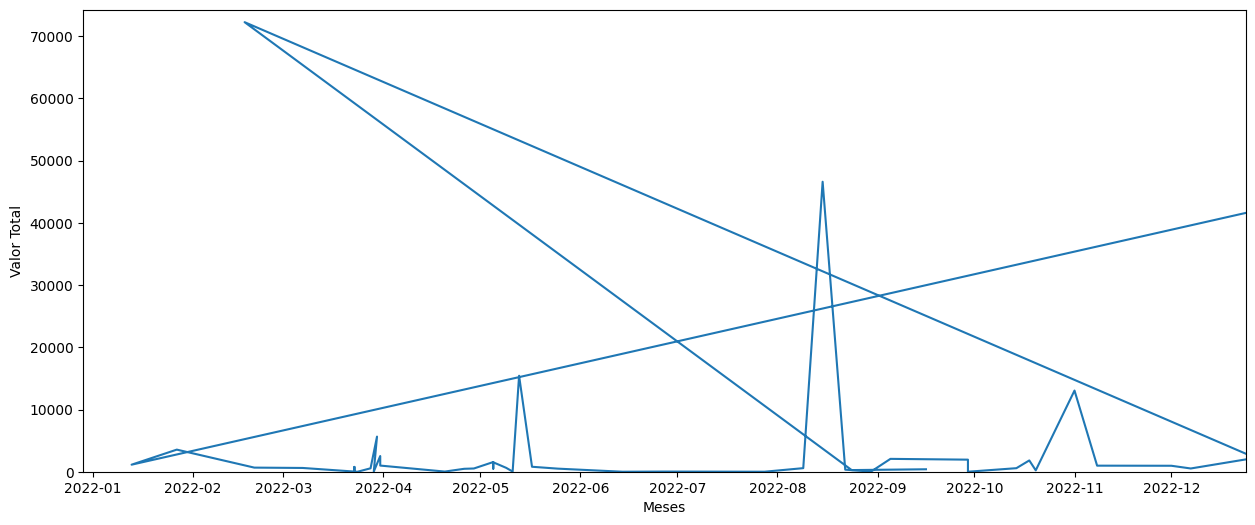

In [18]:
maximo = juridico_final[datas_filtradas]['Valor Total'].max()
print(f'O maior valor da base de 01-2022 até 12-2022 é de R${maximo:.2f} reais')

plt.figure(1, figsize=(15, 6))
plt.plot(juridico_final[datas_filtradas]['Data de Citação'], juridico_final[datas_filtradas]['Valor Total'])
plt.ylabel('Valor Total')
plt.xlabel('Meses')
plt.axis([18990, 19350, 0, max(juridico_final[datas_filtradas]['Valor Total'])+2000])
plt.show()


# Importando as abas para um arquivo EXCEL!

In [22]:
# Célula de código para criar diferentes abas no excel!! - Vai para o final do código!!
#colocar {}.format(x, consolidado, já vem o nome direto e atualiza a própria base)

with pd.ExcelWriter(r'C:\Users\lucas\Python Projects\Tratamento de Dados - Pandas\{}\Base final 022022.xlsx'.format(x)) as writer:  
    pagamentos_consolidado.to_excel(writer, sheet_name='Pagamentos_consolidado', index=False)
    provisoes_consolidado.to_excel(writer, sheet_name='Provisao_atualizada', index=False)
    juridico_final.to_excel(writer, sheet_name='Juridico_tudo', index=False)